In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
def view(img):
    """Takes the images and displays it for view"""
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(14,7))
    plt.imshow(img)
    plt.show()


In [9]:
def load_image(imgpath):
    """takes str path and loads the images as a numpy array.
    Return the loaded image after resizing with shape of (360,640)"""
    
    image=cv2.imread(imgpath)   #read in the image
#     print(image.shape)
    image=cv2.resize(image,(360,640)) #resizing because opencv does not work well with bigger images
    return image

In [33]:
def detect_contours(image):
    """Takes input image and returns the contours of the covid meter in the image"""
    
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  #RGB To Gray Scale
    blurred = cv2.GaussianBlur(gray, (3,3), 3)  #(5,5) is the kernel size and 0 is sigma that determines the amount of blur
    edged=cv2.Canny(blurred, 0, 255)  #30 MinThreshold and 50 is the MaxThreshold
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2)) ### set kernel with shape (2,2)
    opening = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel) ##run that kernel over the entire image as a morphology operator
    contours,hierarchy=cv2.findContours(opening,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  #retrieve the contours as a list, with simple apprximation model

    # print(len(contours))
    contours=sorted(contours,key=cv2.contourArea,reverse=True)

    if len(contours)>600:
        blurred=cv2.GaussianBlur(gray,(3,3),2)
        # view("blur2",blurred)
        edged=cv2.Canny(blurred,0,255)  
        dil = cv2.dilate(edged, kernel, iterations = 10)
        # view("Canny1",dil)
        contours,hierarchy=cv2.findContours(dil,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  #retrieve the contours as a list, with simple apprximation model
    contours=sorted(contours,key=cv2.contourArea,reverse=True)

    try: hierarchy = hierarchy[0]
    except: hierarchy = []

    height, width = edged.shape
    min_x, min_y = width, height
    max_x = max_y = 0

    # computes the bounding box for the contour, and draws it on the frame,
    for contour, hier in zip(contours, hierarchy):
        (x,y,w,h) = cv2.boundingRect(contour)
        min_x, max_x = min(x, min_x), max(x+w, max_x)
        min_y, max_y = min(y, min_y), max(y+h, max_y)
        if w > 80 and h > 3*w:
            cv2.rectangle(image, (x,y), (x+w,y+h), (255, 0, 0), 2)
            break
    view(image)
    return x,y,x+w, y+h
        
        

In [34]:
from glob import glob
imglist  = glob("data/*.jpeg")

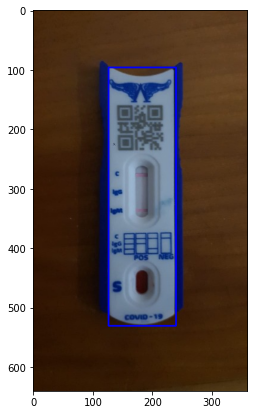

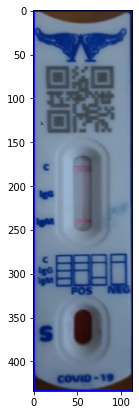

In [38]:
image = load_image(imglist[0])
x1,y1,x2,y2 = detect_contours(image)
meter_img = image[y1:y2, x1:x2 ]
view(meter_img)

In [54]:
meter_img.reshape()

(434, 113, 3)

In [68]:
# view(cv2.resize(meter_img,(256,1024) , interpolation = cv2.INTER_AREA).shape)

In [67]:
# cv2.resize(meter_img,(256,1024) , interpolation = cv2.INTER_AREA)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [139,  14,  27],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

In [42]:


# if max_x - min_x > 0 and max_y - min_y > 0:
#     cv2.rectangle(image, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)

In [43]:
# plt.figure(figsize=(16,4))
# plt.imshow(image)
# plt.show()

In [44]:
# max_=0
# #the loop extracts the boundary contours of the page
# for c in contours:
#     # print (c)
#     p=cv2.arcLength(c,True)
#     approx=cv2.approxPolyDP(c,0.01*p,True)
#     print (cv2.contourArea(c))

#     # print (approx,cv2.contourArea(c))
#     if len(approx)<9 and cv2.contourArea(c)> 400 and len(approx)>=4:
#         target=approx
#         break

In [45]:
# ca

In [46]:
# polygon = []
# poly = []
# x = []
# y = []
# for i in approx:
#     polygon.append(tuple(i[0]))
#     poly.append((i[0]))
#     x.append(i[0][0])
#     y.append(i[0][1])

# print (x,y)

In [47]:
# polygon, poly

In [48]:
# box = []
# # box.append((min(x),min(y)))
# # box.append((min(x),max(y)))
# # box.append((max(x),max(y)))
# # box.append((max(x),min(y)))
# # print (box)

# y_mean = sum(y)//len(x)
# y_up = max(y)
# y_down = min(y)
# for val in y:
#     print (val)
#     if val>y_mean and y_up>val:
#         y_up = val
#     if val<y_mean and y_down<val:
#         y_down = val 

# box.append((min(x),y_down))
# box.append((min(x),y_up))
# box.append((max(x),y_up))
# box.append((max(x),y_down))

In [49]:
# for i in range(len(box)-1):
#     cv2.line(image,box[i],box[i+1],(0, 255, 0),3)
# cv2.line(image,box[i+1],box[0],(0, 255, 0),3)
# view(image)

In [51]:
# x =300
# boxplot = []
# for pt in box:
#     boxplot.append(list(pt))
# boxplot = np.float32(np.array(boxplot))
# pts=np.float32([[0,0],[800,0],[800,400],[0,400]])  #map to 800*800 target window
# # # print (approx)
# # for points in list(box):
# # 	orig = cv2.circle(orig, tuple(points), 3, (0,255,0), 2)
# # view("dot",orig) 
# op=cv2.getPerspectiveTransform(boxplot,pts)  #get the top or bird eye view effect
# dst=cv2.warpPerspective(orig,op,(800,400))
# view(dst)

In [52]:

# img = np.zeros([dst.shape[0],dst.shape[1],3],dtype=np.uint8)
# # img = [[1]*dst.shape[1]]*dst.shape[0]
# color = (255,255,255)
# xmin = dst.shape[1]//3
# ymin = dst.shape[0]//3
# xmax = dst.shape[1]*2//3
# ymax = dst.shape[0]*2//3
# img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color,thickness = -1)
# src = cv2.bitwise_and(dst, img)
# # img = np.array(img,dtype=np.uint8)
# view(dst)

In [53]:
# gray=cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)  #RGB To Gray Scale
# kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
# im = cv2.filter2D(gray, -1, kernel)
# edged=cv2.Canny(im,0,100)  #30 MinThreshold and 50 is the MaxThreshold
# view(edged)

# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))

# opening = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

# # view(opening)




# contours,hierarchy=cv2.findContours(opening,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  #retrieve the contours as a list, with simple apprximation model

# print(len(contours))